<h1> Credit Card Lead Prediction </h1>
<h4> <strong>Description : </strong> <hr>
<i>The Happy Customer Bank wants to cross-sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards. The task is to identify customers that shows higher intent towards a recommended credit card.</i></h4>

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
%matplotlib inline
from scipy.stats import chi2_contingency
import category_encoders as ce
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

<h5> Reading Dataset </h5>

In [2]:
train = pd.read_csv('../input/jobathon-may-2021-credit-card-lead-prediction/train.csv')
test  = pd.read_csv('../input/jobathon-may-2021-credit-card-lead-prediction/test.csv')
sub   = pd.read_csv('../input/jobathon-may-2021-credit-card-lead-prediction/sample_submission.csv')

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


<h4> The Dataset consists of following features: </h4>

<h5>
    
<i>    
   
1. ID : Unique Identifier for a row

2. Gender: Gender of the Customer

3. Age : Age of the Customer (in Years)

4. Region_Code : Code of the Region for the customers

5. Occupation : Occupation Type for the customer

6. Channel_Code : Acquisition Channel Code for the Customer (Encoded)

7. Vintage : Vintage for the Customer (In Months), Number of Days, Customer has been associated with the    company

8. Credit_Product : If the Customer has any active credit product (Home loan, Personal loan, Credit Card    etc.)

10. Avg_Account_Balance : Average Account Balance for the Customer in last 12 Months

11. Is_Active : If the Customer is Active in last 3 Months

12. Is_Lead(Target) : If the Customer is interested for the Credit Card, 0 / 1: Customer is not             interested / interested.
</i>    
 </h5>

In [4]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


<h1> Exploratory Data Analysis </h1>

In [3]:
# Printing number of columns and rows in the dataset
print("There are {} number of rows and {} number of columns in training data".format(train.shape[0],train.shape[1]))
print("There are {} number of rows and {} number of columns in testing data".format(test.shape[0],test.shape[1]))

There are 245725 number of rows and 11 number of columns in training data
There are 105312 number of rows and 10 number of columns in testing data


<AxesSubplot:xlabel='count', ylabel='Is_Lead'>

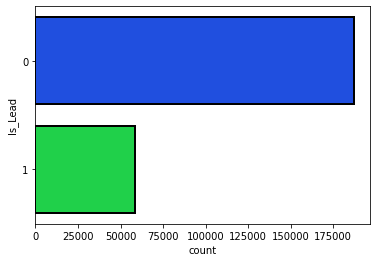

In [10]:
# Checking for data imbalanceness if any
sns.countplot(y=train["Is_Lead"],linewidth=2,edgecolor='black')

<h4>Inference: </h4>
<h5><i>From the above statistics, it appears that the dataset is imbalanced. Class 0 contains 1,75,000+ training examples while Class 1 contains about 65,000 training samples</i></h5>

In [11]:
# Checking the type of columns in dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [12]:
# Describing columns statistics
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [15]:
# Exploring the missing values in training data.
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [5]:
# Exploring the missing values in testing data.
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

<h4> Inference </h4>

<h5><i>From the above results, it appears that the column "Credit_Product" contains the highest number missing values in both the dataset i.e. Train(29,325) and Test set(12,522).</i> </h5>

In [13]:
#Summarizing training data using Data Profiling
import pandas_profiling
train.profile_report()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

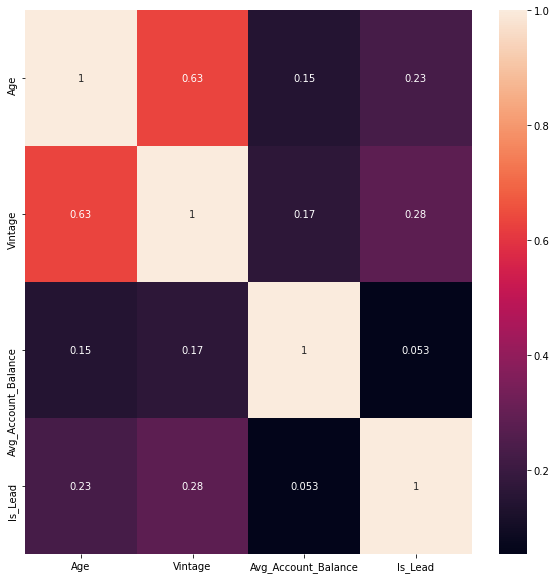

In [14]:
#Correlation Graph
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

<h4> Inference </h4>

<h5><i>From the above results, it appears that the columns "Age" and "Vintage" are weakly correlated with a magnitude of 0.63.</i></h5>

interval columns not set, guessing: ['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']


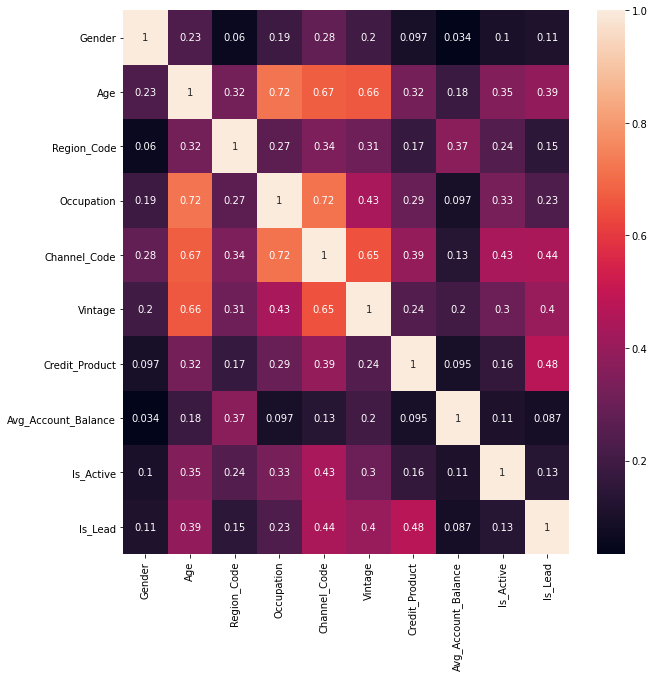

In [15]:
# Phik's correlation Graph
import phik
temp = [feature for feature in train.columns if feature not in ['ID']]
plt.figure(figsize=(10,10))
sns.heatmap(train[temp].phik_matrix(),annot=True)
plt.show()

<h4> Inference </h4>

<h5><i>The above heatmap is used for estimating the correlation between categorical and numerial variables using Phik's correlation coefficient. Further, from the above graph, it appears that the columns "Age","Occupation","Channel_Code" and "Vintage" shows some degree of correlation. We will analyse these columns in next section.</i> </h5>

<AxesSubplot:xlabel='Occupation', ylabel='Age'>

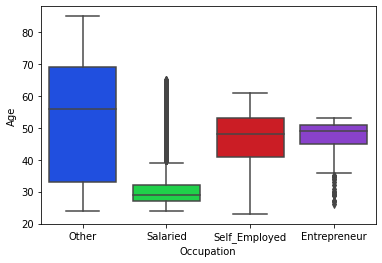

In [16]:
# Further exploring the above relationships
#Relationship between Occupation and Age
sns.boxplot(x=train['Occupation'],y=train["Age"])

<h4> Inference </h4>

<h5><i>From the above box-plot, it appears that the people with "Other" as their occupation contains max. Age group distribution(10-80+ years) followed by people with "Self-Employed" profession shows (10-60) years of Age groups. The remaining columns contains outliers and shows min. distribution</i> </h5>

<AxesSubplot:xlabel='Channel_Code', ylabel='Age'>

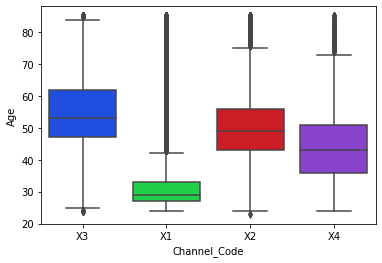

In [17]:
# Relationship between Channel_Code and Age
sns.boxplot(x="Channel_Code",y='Age',data=train)

<h4> Inference </h4>

<h5><i>From the above box-plot, it appears that the columns contains lots of outliers and the degree of relationship amongst them is also weak(0.67).</i> </h5>

<AxesSubplot:xlabel='Vintage', ylabel='Age'>

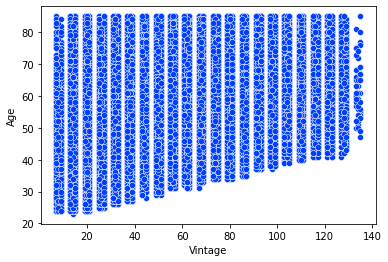

In [18]:
# Relationship between "Age" and "Vintage"
sns.scatterplot(x="Vintage",y='Age',data=train)

<h4> Inference </h4>

<h5><i>From the above scatter-plot, it appears that no specific relationship exists between the columns. Also, their phik's correlation is also weak(0.66)</i> </h5>

In [21]:
# Categorical Features and their cardinality
categorical_feature = [feature for feature in train.columns if feature not in ['Age','Vintage','Avg_Account_Balance','ID']]
for feature in categorical_feature:
    print("The feature is {} and its cardinality is {}".format(feature,len(train[feature].unique())))

The feature is Gender and its cardinality is 2
The feature is Region_Code and its cardinality is 35
The feature is Occupation and its cardinality is 4
The feature is Channel_Code and its cardinality is 4
The feature is Credit_Product and its cardinality is 3
The feature is Is_Active and its cardinality is 2
The feature is Is_Lead and its cardinality is 2


<h4> Inference </h4>

<h5><i>From the above results, it appears that the column "Region_Code" consists of maximum cardinality count of 35. Let's see if we can reduce it's cardinality and make it useful for prediction</i> </h5>

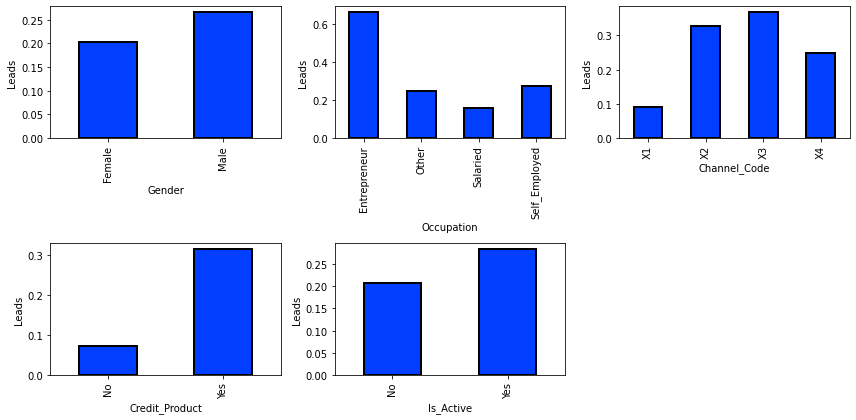

In [5]:
# Visualizing relationsip between categorical and target values
column_list =  ['Gender','Occupation','Channel_Code','Credit_Product','Is_Active']

plt.figure(figsize=(12,12))
for i in range(0,len(column_list)):
    data = train.copy()
    plt.subplot(4,3,i+1)
    data.groupby(column_list[i])['Is_Lead'].mean().plot(kind="bar",linewidth=2,edgecolor="black")
    plt.ylabel('Leads')
    plt.tight_layout()


<h4> Inference </h4>

<h5><i>From the above bar-plots, following observations can be deduced:
    
* **Gender :** It appears that "Male" category shows higher intent towards the recommended credit card.
* **Occupation:** It appears that the person having "Enterpreneur" as Occupation shows more interest while "Salaried" person shows the least.
* **Channel_Code:** It appears that the person subscribed through medium "X3" shows higher intent while "X1" shows the lowest.
* **Credit_Product:** It appears that the person with active credit product shows more interest.
* **Is_Active:** It appears that persons with active account shows more interest.

</i> </h5>

<h1> Data Preprocessing </h1>

In [3]:
# Imputing the missing features
train_imputed = train.copy()
test_imputed  = test.copy() 
feature = ['Credit_Product']

def impute_missing(train_data,test_data,feature):
    train_data[feature+'_nan'] = np.where(train_data[feature].isnull(),1,0)
    train_data[feature] = np.where(train_data[feature].isnull(),train_data[feature].mode(),train_data[feature])
    test_data[feature+'_nan'] = np.where(test_data[feature].isnull(),1,0)
    test_data[feature] =  np.where(test_data[feature].isnull(),test_data[feature].mode(),test_data[feature])
    return train_data,test_data
    
train_imputed,test_imputed = impute_missing(train_imputed,test_imputed,feature[0])

In [4]:
#Checking the presence of null values.
train_imputed.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
Credit_Product_nan     0
dtype: int64

In [5]:
#Checking the presence of null values.
test_imputed.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Credit_Product_nan     0
dtype: int64

In [95]:
train_imputed.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Credit_Product_nan
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,No,1056750,Yes,1,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0,0


<h1> Feature Engineering </h1>

<h4><i> We will be designing features using both manula and automatic approach (Using Feature Tools Library).</i> </h4>

<h4> 1. Designing Features Automatically. </h4>

In [6]:
# Seperating target and training data as input for automatic feature designing. 
y_temp = train_imputed[['Is_Lead']]
temp_train =  train_imputed.drop(columns=["Is_Lead"],axis=1)

In [7]:
#!pip install featuretools  --> Uncomment for installing automatic feature library.

# Initialising feature tools library on training data.
import featuretools as ft
es = ft.EntitySet(id='y_temp')
es.entity_from_dataframe(entity_id='credit_card',dataframe=temp_train,index='ID')
print(es)

Entityset: y_temp
  Entities:
    credit_card [Rows: 245725, Columns: 11]
  Relationships:
    No relationships


In [8]:
# Initialising feature tools library on testing data.

es_2 = ft.EntitySet(id='y_temp')
es_2.entity_from_dataframe(entity_id='credit_card_1',dataframe=test_imputed,index='ID')
print(es_2)

Entityset: y_temp
  Entities:
    credit_card_1 [Rows: 105312, Columns: 11]
  Relationships:
    No relationships


In [9]:
#Generating 18 features for training data. 
feature_matrix,feature_names = ft.dfs(entityset=es,target_entity='credit_card',max_depth=2,verbose=1,
                                      n_jobs=-1,trans_primitives=['percentile','cum_mean'])

Built 18 features
EntitySet scattered to 4 workers in 11 seconds
Elapsed: 00:04 | Progress: 100%|██████████


In [10]:
#Generating 18 features for testing data. 

feature_matrix_test,feature_names_test = ft.dfs(entityset=es_2,target_entity='credit_card_1',max_depth=2,verbose=1,
                                      n_jobs=-1,trans_primitives=['percentile','cum_mean'])

Built 18 features
EntitySet scattered to 4 workers in 7 seconds
Elapsed: 00:02 | Progress: 100%|██████████


In [11]:
feature_matrix_test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Credit_Product_nan,CUM_MEAN(Age),CUM_MEAN(Avg_Account_Balance),CUM_MEAN(Credit_Product_nan),CUM_MEAN(Vintage),PERCENTILE(Age),PERCENTILE(Avg_Account_Balance),PERCENTILE(Credit_Product_nan),PERCENTILE(Vintage)
ID,,,,,,,,,,,,,,,,,,
VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,0,29.000000,742366.000000,0.000000,25.000000,0.206705,0.376562,0.440553,0.329825
CCMEWNKY,Male,43,RG268,Other,X2,49,No,925537,No,1,36.000000,833951.500000,0.500000,37.000000,0.501481,0.520026,0.940553,0.610154
VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,0,34.333333,627950.666667,0.333333,29.333333,0.294534,0.007449,0.440553,0.084335
TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,0,33.000000,687980.500000,0.250000,30.250000,0.206705,0.478720,0.440553,0.536639
SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,0,32.200000,681801.800000,0.200000,28.000000,0.206705,0.299842,0.440553,0.184623


In [16]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

ft.primitives.list_primitives()

,name,type,dask_compatible,koalas_compatible,description,valid_inputs,return_type
0,last,aggregation,False,False,Determines the last value in a list.,Variable,None
1,std,aggregation,True,True,Computes the dispersion relative to the mean v...,Numeric,Numeric
2,n_most_common,aggregation,False,False,Determines the `n` most common elements.,Discrete,Discrete
3,num_unique,aggregation,True,True,"Determines the number of distinct values, igno...",Discrete,Numeric
4,median,aggregation,False,False,Determines the middlemost number in a list of ...,Numeric,Numeric
5,trend,aggregation,False,False,Calculates the trend of a variable over time.,"Numeric, DatetimeTimeIndex",Numeric
6,min,aggregation,True,True,"Calculates the smallest value, ignoring `NaN` ...",Numeric,Numeric
7,time_since_first,aggregation,False,False,Calculates the time elapsed since the first da...,DatetimeTimeIndex,Numeric
8,mean,aggregation,True,True,Computes the average for a list of values.,Numeric,Numeric
9,percent_true,aggregation,True,False,Determines the percent of `True` values.,Boolean,Numeric


In [12]:
# Visualizing features created using  automatic approach.
feature_matrix_test.head(10)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Credit_Product_nan,CUM_MEAN(Age),CUM_MEAN(Avg_Account_Balance),CUM_MEAN(Credit_Product_nan),CUM_MEAN(Vintage),PERCENTILE(Age),PERCENTILE(Avg_Account_Balance),PERCENTILE(Credit_Product_nan),PERCENTILE(Vintage)
ID,,,,,,,,,,,,,,,,,,
VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,0,29.000000,7.423660e+05,0.000000,25.000000,0.206705,0.376562,0.440553,0.329825
CCMEWNKY,Male,43,RG268,Other,X2,49,No,925537,No,1,36.000000,8.339515e+05,0.500000,37.000000,0.501481,0.520026,0.940553,0.610154
VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,0,34.333333,6.279507e+05,0.333333,29.333333,0.294534,0.007449,0.440553,0.084335
TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,0,33.000000,6.879805e+05,0.250000,30.250000,0.206705,0.478720,0.440553,0.536639
SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,0,32.200000,6.818018e+05,0.200000,28.000000,0.206705,0.299842,0.440553,0.184623
MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No,0,36.833333,1.338878e+06,0.166667,41.666667,0.852154,0.990115,0.440553,0.954146
Y88TW36I,Female,69,RG253,Other,X2,67,No,1032764,No,0,41.428571,1.295148e+06,0.142857,45.285714,0.929353,0.590493,0.440553,0.712896
3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,837009,No,0,40.000000,1.237880e+06,0.125000,43.750000,0.255693,0.455665,0.440553,0.536639
VVUKMUJT,Male,43,RG284,Salaried,X3,81,No,1001232,Yes,1,40.333333,1.211586e+06,0.222222,47.888889,0.501481,0.571364,0.940553,0.797430


In [13]:
# Filtering out irrelevant features and resetting the index in training and testing data.
feature_matrix = feature_matrix.reindex(index=temp_train['ID'])
train_imputed = feature_matrix.reset_index()
train_imputed = train_imputed.drop(columns=['PERCENTILE(Avg_Account_Balance)','PERCENTILE(Credit_Product_nan)',
                                            'PERCENTILE(Vintage)','CUM_MEAN(Credit_Product_nan)'],axis=1)
feature_matrix_test = feature_matrix_test.reindex(index=test_imputed['ID'])
test_imputed = feature_matrix_test.reset_index()
test_imputed = test_imputed.drop(columns=['PERCENTILE(Avg_Account_Balance)','PERCENTILE(Credit_Product_nan)',
                                            'PERCENTILE(Vintage)','CUM_MEAN(Credit_Product_nan)'],axis=1)

In [14]:
train_imputed.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Credit_Product_nan,CUM_MEAN(Age),CUM_MEAN(Avg_Account_Balance),CUM_MEAN(Vintage),PERCENTILE(Age)
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,73.00,1045696.00,43.000000,0.952166
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,51.50,813842.00,37.500000,0.254787
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,53.00,1037333.00,33.666667,0.792443
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,48.25,895613.25,30.000000,0.365974
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,44.60,893848.00,30.600000,0.254787


In [15]:
test_imputed.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Credit_Product_nan,CUM_MEAN(Age),CUM_MEAN(Avg_Account_Balance),CUM_MEAN(Vintage),PERCENTILE(Age)
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,0,29.000000,742366.000000,25.000000,0.206705
1,CCMEWNKY,Male,43,RG268,Other,X2,49,No,925537,No,1,36.000000,833951.500000,37.000000,0.501481
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,0,34.333333,627950.666667,29.333333,0.294534
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,0,33.000000,687980.500000,30.250000,0.206705
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,0,32.200000,681801.800000,28.000000,0.206705


<h4> 2. Designing Features Using Manually Approach. </h4>

In [16]:
# Feature Eng. numerical variables

def eng_age(train_data,test_data):
    train_data['Age_cat'] = pd.qcut(train_data.Age,  q=4, labels=False)
    test_data['Age_cat'] = pd.qcut(test_data.Age, q=4, labels=False)
    return train_data,test_data


def eng_vintage(train_data,test_data):
    train_data["Vintage_cat"] = pd.qcut(train_data["Vintage"], q=4, labels=False)
    test_data["Vintage_cat"] = pd.qcut(test_data["Vintage"], q=4, labels=False)
    return train_data,test_data

def eng_region_code(train_data,test_data):
    feature_to_encode_freq = ["Region_Code"]
    count_enc = ce.CountEncoder()
    count_encoded_train = count_enc.fit_transform(train_data[feature_to_encode_freq])
    train_data = train_data.join(count_encoded_train.add_suffix("_count"))
    train_data["Region_Code_count"] = np.where(train_data["Region_Code_count"]<10000,0,train_data["Region_Code_count"])
    count_encoded_test = pd.DataFrame(count_enc.transform(test_data[feature_to_encode_freq]))
    test_data = test_data.join(count_encoded_test.add_suffix("_count"))
    test_data["Region_Code_count"] = np.where(test_data["Region_Code_count"]<10000,0,test_data["Region_Code_count"])
    return train_data,test_data


def feature_eng(train_data,test_data):
    '''
    Input: train_data : Training Data
           test_data  : Testing Data
           
    Output: Training and Testing data after applying Feature Eng.
    '''
    
    train_data,test_data = eng_age(train_data,test_data) # Feature Eng. Age column
    train_data,test_data = eng_vintage(train_data,test_data) # Feature Eng. Vintage column
    train_data,test_data = eng_region_code(train_data,test_data) # Feature Eng. Region_Code column
    return train_data,test_data

train_eng,test_eng = feature_eng(train_imputed,test_imputed) # Calling function feature_eng to generate features.


In [23]:
train_eng.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Credit_Product_nan,CUM_MEAN(Age),CUM_MEAN(Avg_Account_Balance),CUM_MEAN(Vintage),PERCENTILE(Age),Age_cat,Vintage_cat,Region_Code_count
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,73.000000,1.045696e+06,43.000000,0.952166,3,2,35934
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,51.500000,8.138420e+05,37.500000,0.254787,0,1,12826
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,53.000000,1.037333e+06,33.666667,0.792443,3,1,35934
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,48.250000,8.956132e+05,30.000000,0.365974,1,0,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,44.600000,8.938480e+05,30.600000,0.254787,0,2,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0,46.500000,8.355672e+05,30.833333,0.792443,3,1,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,No,1056750,Yes,1,48.714286,8.671647e+05,29.285714,0.876160,3,0,0
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0,48.625000,8.143596e+05,27.250000,0.615403,2,0,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0,47.666667,8.654623e+05,28.444444,0.452203,1,2,29416
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0,48.400000,9.803400e+05,30.500000,0.774823,3,2,35934


In [24]:
test_eng.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Credit_Product_nan,CUM_MEAN(Age),CUM_MEAN(Avg_Account_Balance),CUM_MEAN(Vintage),PERCENTILE(Age),Age_cat,Vintage_cat,Region_Code_count
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,0,29.000000,742366.000000,25.000000,0.206705,0,1,26840
1,CCMEWNKY,Male,43,RG268,Other,X2,49,No,925537,No,1,36.000000,833951.500000,37.000000,0.501481,1,2,35934
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,0,34.333333,627950.666667,29.333333,0.294534,1,0,0
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,0,33.000000,687980.500000,30.250000,0.206705,0,2,0
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,0,32.200000,681801.800000,28.000000,0.206705,0,0,0


In [17]:
# Removing the skewness of columns using Power Transformer.
from sklearn.preprocessing import PowerTransformer
feature_to_transform = ['Avg_Account_Balance']
pt = PowerTransformer(method='yeo-johnson',standardize=False)
train_transform = pd.DataFrame(pt.fit_transform(train_eng[feature_to_transform]),columns=["Avg_acct_Bal_Transformed"])
test_transform = pd.DataFrame(pt.transform(test_eng[feature_to_transform]),columns=["Avg_acct_Bal_Transformed"])
train_transform.head()

,Avg_acct_Bal_Transformed
0,6.919444
1,6.796773
2,6.988910
3,6.750145
4,6.885771


array([[<AxesSubplot:title={'center':'Avg_acct_Bal_Transformed'}>]],
      dtype=object)

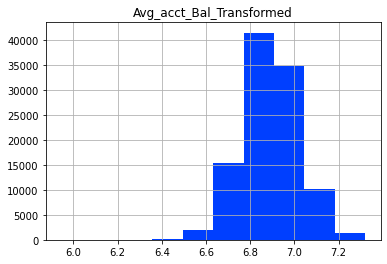

In [18]:
# Visualizing the histogram of transformed column.
test_transform.hist()

In [19]:
# Merging the transformed column.
train_eng = pd.concat([train_eng,train_transform],axis=1)
test_eng  = pd.concat([test_eng,test_transform],axis=1)
train_eng.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Credit_Product_nan,CUM_MEAN(Age),CUM_MEAN(Avg_Account_Balance),CUM_MEAN(Vintage),PERCENTILE(Age),Age_cat,Vintage_cat,Region_Code_count,Avg_acct_Bal_Transformed
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,73.00,1045696.00,43.000000,0.952166,3,2,35934,6.919444
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,51.50,813842.00,37.500000,0.254787,0,1,12826,6.796773
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,53.00,1037333.00,33.666667,0.792443,3,1,35934,6.988910
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,48.25,895613.25,30.000000,0.365974,1,0,0,6.750145
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,44.60,893848.00,30.600000,0.254787,0,2,0,6.885771


In [28]:
test_eng.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Credit_Product_nan,CUM_MEAN(Age),CUM_MEAN(Avg_Account_Balance),CUM_MEAN(Vintage),PERCENTILE(Age),Age_cat,Vintage_cat,Region_Code_count,Avg_acct_Bal_Transformed
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,0,29.000000,742366.000000,25.000000,0.206705,0,1,26840,6.848733
1,CCMEWNKY,Male,43,RG268,Other,X2,49,No,925537,No,1,36.000000,833951.500000,37.000000,0.501481,1,2,35934,6.894570
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,0,34.333333,627950.666667,29.333333,0.294534,1,0,0,6.569397
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,0,33.000000,687980.500000,30.250000,0.206705,0,2,0,6.881366
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,0,32.200000,681801.800000,28.000000,0.206705,0,0,0,6.822865


In [20]:
# Removing redundant columns
train_eng = train_eng.drop(columns=["ID","Age","Vintage","Avg_Account_Balance","Region_Code"])
test_eng = test_eng.drop(columns=["ID","Age","Vintage","Avg_Account_Balance","Region_Code"])

In [21]:
train_eng.head(10)

,Gender,Occupation,Channel_Code,Credit_Product,Is_Active,Credit_Product_nan,CUM_MEAN(Age),CUM_MEAN(Avg_Account_Balance),CUM_MEAN(Vintage),PERCENTILE(Age),Age_cat,Vintage_cat,Region_Code_count,Avg_acct_Bal_Transformed
0,Female,Other,X3,No,No,0,73.000000,1.045696e+06,43.000000,0.952166,3,2,35934,6.919444
1,Female,Salaried,X1,No,No,0,51.500000,8.138420e+05,37.500000,0.254787,0,1,12826,6.796773
2,Female,Self_Employed,X3,No,Yes,0,53.000000,1.037333e+06,33.666667,0.792443,3,1,35934,6.988910
3,Male,Salaried,X1,No,No,0,48.250000,8.956132e+05,30.000000,0.365974,1,0,0,6.750145
4,Female,Salaried,X1,No,No,0,44.600000,8.938480e+05,30.600000,0.254787,0,2,0,6.885771
5,Male,Self_Employed,X1,No,Yes,0,46.500000,8.355672e+05,30.833333,0.792443,3,1,0,6.782168
6,Male,Other,X3,No,Yes,1,48.714286,8.671647e+05,29.285714,0.876160,3,0,0,6.921571
7,Female,Self_Employed,X3,No,Yes,0,48.625000,8.143596e+05,27.250000,0.615403,2,0,0,6.737626
8,Female,Self_Employed,X2,No,No,0,47.666667,8.654623e+05,28.444444,0.452203,1,2,29416,6.958997
9,Female,Self_Employed,X2,Yes,No,0,48.400000,9.803400e+05,30.500000,0.774823,3,2,35934,7.047208


In [22]:
# Using Feature Encoding Techniques for encoding required features.

le = LabelEncoder()
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
cols_to_le = ["Region_Code_count"] 
cols_to_ohe = ["Gender","Occupation","Channel_Code","Credit_Product","Is_Active"]

def ohe_encoding_columns(train_data,test_data,cols):
    
    train_data = pd.get_dummies(train_data[cols],prefix = cols)
    test_data =  pd.get_dummies(test_data[cols],prefix  = cols)
    return train_data,test_data

def le_encoding_columns(train_data,test_data,col):

    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] =  le.transform(test_data[col])
    return train_data,test_data


train_encoded_ohe,test_encoded_ohe = ohe_encoding_columns(train_eng,test_eng,cols_to_ohe) # One-Hot Encoding
train_encoded_le,test_encoded_le = le_encoding_columns(train_eng,test_eng,cols_to_le[0])  # Label Encoding

In [23]:
# Concatenating columns with both type of encoding and dropping the redundant features.
train_encoded =  pd.concat([train_encoded_ohe,train_encoded_le],axis=1)
test_encoded  =  pd.concat([test_encoded_ohe,test_encoded_le],axis=1)
train_encoded =  train_encoded.drop(columns=["Gender","Occupation","Channel_Code","Credit_Product","Is_Active"],axis=1)
test_encoded =  test_encoded.drop(columns=["Gender","Occupation","Channel_Code","Credit_Product","Is_Active"],axis=1)
train_encoded.head()

,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,...,Is_Active_Yes,Credit_Product_nan,CUM_MEAN(Age),CUM_MEAN(Avg_Account_Balance),CUM_MEAN(Vintage),PERCENTILE(Age),Age_cat,Vintage_cat,Region_Code_count,Avg_acct_Bal_Transformed
0,1,0,0,1,0,0,0,0,1,0,...,0,0,73.00,1045696.00,43.000000,0.952166,3,2,6,6.919444
1,1,0,0,0,1,0,1,0,0,0,...,0,0,51.50,813842.00,37.500000,0.254787,0,1,2,6.796773
2,1,0,0,0,0,1,0,0,1,0,...,1,0,53.00,1037333.00,33.666667,0.792443,3,1,6,6.988910
3,0,1,0,0,1,0,1,0,0,0,...,0,0,48.25,895613.25,30.000000,0.365974,1,0,0,6.750145
4,1,0,0,0,1,0,1,0,0,0,...,0,0,44.60,893848.00,30.600000,0.254787,0,2,0,6.885771


In [24]:
test_encoded.head()

,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,...,Is_Active_Yes,Credit_Product_nan,CUM_MEAN(Age),CUM_MEAN(Avg_Account_Balance),CUM_MEAN(Vintage),PERCENTILE(Age),Age_cat,Vintage_cat,Region_Code_count,Avg_acct_Bal_Transformed
0,0,1,0,1,0,0,1,0,0,0,...,0,0,29.000000,742366.000000,25.000000,0.206705,0,1,4,6.848733
1,0,1,0,1,0,0,0,1,0,0,...,0,1,36.000000,833951.500000,37.000000,0.501481,1,2,6,6.894570
2,0,1,0,0,1,0,1,0,0,0,...,0,0,34.333333,627950.666667,29.333333,0.294534,1,0,0,6.569397
3,0,1,0,1,0,0,1,0,0,0,...,0,0,33.000000,687980.500000,30.250000,0.206705,0,2,0,6.881366
4,1,0,0,1,0,0,1,0,0,0,...,0,0,32.200000,681801.800000,28.000000,0.206705,0,0,0,6.822865


In [25]:
# Seperating target and training data.
Y = y_temp.copy()
X = train_encoded.copy()
X_test = test_encoded.copy()

In [26]:
# Standardizing the variables using Standard Scaler.
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X))
X_train_scaled.columns = X.columns


X_test_scaled = pd.DataFrame(sc.fit_transform(X_test))
X_test_scaled.columns = X_test.columns

X_train_scaled.head()

,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,...,Is_Active_Yes,Credit_Product_nan,CUM_MEAN(Age),CUM_MEAN(Avg_Account_Balance),CUM_MEAN(Vintage),PERCENTILE(Age),Age_cat,Vintage_cat,Region_Code_count,Avg_acct_Bal_Transformed
0,1.096931,-1.096931,-0.104751,1.581677,-0.643770,-0.834589,-0.854618,-0.616835,1.605042,-0.15228,...,-0.796872,-0.368121,323.587694,-15.443441,-18.345189,1.567078,1.378544,0.466518,1.553112,0.239639
1,1.096931,-1.096931,-0.104751,-0.632240,1.553349,-0.834589,1.170113,-0.616835,-0.623037,-0.15228,...,-0.796872,-0.368121,84.624808,-57.969022,-44.091863,-0.849849,-1.283293,-0.423735,-0.128265,-0.728404
2,1.096931,-1.096931,-0.104751,-0.632240,-0.643770,1.198194,-0.854618,-0.616835,1.605042,-0.15228,...,1.254906,-0.368121,101.296638,-16.977343,-62.036514,1.013520,1.378544,-0.423735,1.553112,0.787816
3,-0.911634,0.911634,-0.104751,-0.632240,1.553349,-0.834589,1.170113,-0.616835,-0.623037,-0.15228,...,-0.796872,-0.368121,48.502512,-42.970920,-79.200963,-0.464504,-0.396014,-1.313988,-0.968953,-1.096365
4,1.096931,-1.096931,-0.104751,-0.632240,1.553349,-0.834589,1.170113,-0.616835,-0.623037,-0.15228,...,-0.796872,-0.368121,7.934394,-43.294694,-76.392235,-0.849849,-1.283293,0.466518,-0.968953,-0.026086


In [27]:
X_test_scaled.head()

,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,...,Is_Active_Yes,Credit_Product_nan,CUM_MEAN(Age),CUM_MEAN(Avg_Account_Balance),CUM_MEAN(Vintage),PERCENTILE(Age),Age_cat,Vintage_cat,Region_Code_count,Avg_acct_Bal_Transformed
0,-0.908299,0.908299,-0.101601,1.579601,-0.644595,-0.833846,1.169364,-0.619039,-0.620404,-0.152157,...,-0.806682,-0.367355,-109.742680,-41.089642,-73.266265,-1.016502,-1.282846,-0.421427,0.711606,-0.321699
1,-0.908299,0.908299,-0.101601,1.579601,-0.644595,-0.833846,-0.855165,1.615408,-0.620404,-0.152157,...,-0.806682,2.722161,-57.959133,-31.294855,-32.972459,0.005117,-0.394912,0.468745,1.554086,0.038956
2,-0.908299,0.908299,-0.101601,-0.633071,1.551361,-0.833846,1.169364,-0.619039,-0.620404,-0.152157,...,-0.806682,-0.367355,-70.288549,-53.326010,-58.715724,-0.712107,-0.394912,-1.311599,-0.973353,-2.519573
3,-0.908299,0.908299,-0.101601,1.579601,-0.644595,-0.833846,1.169364,-0.619039,-0.620404,-0.152157,...,-0.806682,-0.367355,-80.152082,-46.906004,-55.637725,-1.016502,-1.282846,0.468745,-0.973353,-0.064932
4,1.100959,-1.100959,-0.101601,1.579601,-0.644595,-0.833846,1.169364,-0.619039,-0.620404,-0.152157,...,-0.806682,-0.367355,-86.070201,-47.566797,-63.192813,-1.016502,-1.282846,-1.311599,-0.973353,-0.525235


In [30]:
# Spitting the data using train_test_Split approach
X_train,x_test,Y_train,y_test = train_test_split(X_train_scaled,Y,test_size=0.1,stratify=Y,random_state=0)
x_train,x_valid,y_train,y_valid = train_test_split(X_train,Y_train,test_size=0.1,stratify=Y_train,random_state=0)

<h1> Modelling </h1>

In [28]:
# Importing the libraries for different modelling approaches.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

<h4>  Logistic Regression </h4>

In [39]:
model_1=LogisticRegression(max_iter=500,random_state=0)
model_1.fit(x_train,y_train.values.ravel())
pred = model_1.predict(x_valid)
score_1 = accuracy_score(y_valid,pred)
score_1

0.8548562126966902

In [71]:
predictions_1 = model_1.predict(x_test)
score_1 = accuracy_score(y_test,predictions_1)
score_1

0.8541895576445693

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_1,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     18744
           1       0.84      0.47      0.61      5829

    accuracy                           0.85     24573
   macro avg       0.85      0.72      0.76     24573
weighted avg       0.85      0.85      0.84     24573



<h4>  KNN Classifier </h4>

In [40]:
model_2 = KNeighborsClassifier()
model_2.fit(x_train,y_train.values.ravel())
pred = model_2.predict(x_valid)
score_2 = accuracy_score(y_valid,pred)
score_2

0.8447730150117562

In [43]:
predictions_2 = model_2.predict(x_test)
print(classification_report(y_test,predictions_2,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     18744
           1       0.72      0.57      0.64      5829

    accuracy                           0.85     24573
   macro avg       0.80      0.75      0.77     24573
weighted avg       0.84      0.85      0.84     24573



<h4> Naive Bayes </h4>

In [31]:
model_4=GaussianNB()
model_4.fit(x_train,y_train.values.ravel())
pred = model_4.predict(x_valid)
score_4 = accuracy_score(y_valid,pred)
score_4

0.7855398806294086

In [32]:
predictions_4 = model_4.predict(x_test)
print(classification_report(y_test,predictions_4,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     18744
           1       0.54      0.67      0.60      5829

    accuracy                           0.79     24573
   macro avg       0.72      0.75      0.73     24573
weighted avg       0.81      0.79      0.79     24573



<h4>  Decision Trees </h4>

In [33]:
model_5=DecisionTreeClassifier(random_state=0)
model_5.fit(x_train,y_train.values.ravel())
pred = model_5.predict(x_valid)
score_5 = accuracy_score(y_valid,pred)
score_5

0.7850425031651294

In [34]:
predictions_5 = model_5.predict(x_test)
print(classification_report(y_test,predictions_5,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     18744
           1       0.55      0.56      0.55      5829

    accuracy                           0.79     24573
   macro avg       0.70      0.71      0.71     24573
weighted avg       0.79      0.79      0.79     24573



<h4> Random Forest </h4>

In [35]:
model_6=RandomForestClassifier(random_state=0)
model_6.fit(x_train,y_train.values.ravel())
pred = model_6.predict(x_valid)
score_6 = accuracy_score(y_valid,pred)
score_6

0.8565744257551094

In [36]:
predictions_6 = model_6.predict(x_test)
print(classification_report(y_test,predictions_6,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18744
           1       0.77      0.56      0.65      5829

    accuracy                           0.86     24573
   macro avg       0.82      0.75      0.78     24573
weighted avg       0.85      0.86      0.85     24573



<h4> XGBOOST </h4>

In [37]:
from xgboost import XGBClassifier
model_7 = XGBClassifier()
model_7.fit(x_train,y_train.values.ravel())
pred = model_7.predict(x_valid)
score_7 = accuracy_score(y_valid,pred)
score_7

[22:37:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8591065292096219

In [38]:
predictions_7 = model_7.predict(x_test)
print(classification_report(y_test,predictions_7,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     18744
           1       0.80      0.54      0.65      5829

    accuracy                           0.86     24573
   macro avg       0.84      0.75      0.78     24573
weighted avg       0.85      0.86      0.85     24573



<h4> CATBOOST </h4>

In [39]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(verbose=2,iterations=500,od_type='Iter')
cat_model.fit(x_train,y_train,eval_set=(x_valid,y_valid))
print(cat_model.best_score_)

Learning rate set to 0.158377
0:	learn: 0.5736317	test: 0.5735523	best: 0.5735523 (0)	total: 104ms	remaining: 52s
2:	learn: 0.4486900	test: 0.4484908	best: 0.4484908 (2)	total: 186ms	remaining: 30.8s
4:	learn: 0.3972845	test: 0.3966685	best: 0.3966685 (4)	total: 263ms	remaining: 26.1s
6:	learn: 0.3742747	test: 0.3734527	best: 0.3734527 (6)	total: 405ms	remaining: 28.5s
8:	learn: 0.3617174	test: 0.3610289	best: 0.3610289 (8)	total: 534ms	remaining: 29.2s
10:	learn: 0.3561092	test: 0.3554467	best: 0.3554467 (10)	total: 661ms	remaining: 29.4s
12:	learn: 0.3530560	test: 0.3524111	best: 0.3524111 (12)	total: 793ms	remaining: 29.7s
14:	learn: 0.3507393	test: 0.3502161	best: 0.3502161 (14)	total: 915ms	remaining: 29.6s
16:	learn: 0.3496742	test: 0.3492163	best: 0.3492163 (16)	total: 1.03s	remaining: 29.2s
18:	learn: 0.3489721	test: 0.3486533	best: 0.3486533 (18)	total: 1.14s	remaining: 28.9s
20:	learn: 0.3485642	test: 0.3482231	best: 0.3482231 (20)	total: 1.26s	remaining: 28.7s
22:	learn: 0.3

In [40]:
predictions_8 = cat_model.predict(x_test)
print(classification_report(y_test,predictions_8,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     18744
           1       0.82      0.53      0.64      5829

    accuracy                           0.86     24573
   macro avg       0.85      0.75      0.78     24573
weighted avg       0.86      0.86      0.85     24573



<h4> LGBM </h4>

In [41]:
model_9 = LGBMClassifier()
model_9.fit(x_train,y_train.values.ravel())
pred_9 = model_9.predict(x_valid)
score_9 = accuracy_score(y_valid,pred_9)
score_9

0.8598299873394827

In [42]:
predictions_9 = model_9.predict(x_test)
print(classification_report(y_test,predictions_9,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91     18744
           1       0.83      0.52      0.64      5829

    accuracy                           0.86     24573
   macro avg       0.85      0.74      0.78     24573
weighted avg       0.86      0.86      0.85     24573



In [43]:
print(accuracy_score(y_test,predictions_9))

0.8603345134904163


<h4>  Passive Aggressive Classifier </h4>

In [44]:
from sklearn.linear_model import PassiveAggressiveClassifier
model_10 = PassiveAggressiveClassifier()
model_10.fit(x_train,y_train.values.ravel())
pred_10 = model_10.predict(x_valid)
score_10 = accuracy_score(y_valid,pred_10)
score_10

0.776903599204196

In [45]:
predictions_10 = model_10.predict(x_test)
print(classification_report(y_test,predictions_10,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     18744
           1       0.52      0.58      0.55      5829

    accuracy                           0.77     24573
   macro avg       0.69      0.71      0.70     24573
weighted avg       0.78      0.77      0.78     24573



In [46]:
print(accuracy_score(y_test,predictions_10))

0.7738167907866358


<h4> Applying Hyper-Parameter Tuning </h4>

<h4> Tuning Random Forest </h4>

In [ ]:
param_grid={'max_depth':range(6,9),'n_estimators':range(300,500,100),"max_features": range(9,11)}
rand_search_rf = RandomizedSearchCV(RandomForestClassifier(),param_grid,verbose=1,cv=10,n_jobs=-1)
rand_search_rf.fit(x_train,y_train.values.ravel())

In [ ]:
rand_search_rf.best_params_

In [ ]:
rand_search_predictions = rand_search_rf.predict(x_test)
print(classification_report(y_test,rand_search_predictions,target_names=['0','1']))

In [ ]:
print(accuracy_score(y_test,rand_search_predictions))

<h4> Tuning XGBOOST </h4>

In [ ]:
param_grid_xg={"learning_rate" : [0.05,0.07] ,
 "max_depth"        : [ 1,3,5],
 "min_child_weight" : [ 3,5],
 "gamma"            : [ 0.0],
 "colsample_bytree" : [0.3,0.5],
 "n_estimators"     : [300,500]}
rand_search_xg = RandomizedSearchCV(XGBClassifier(),param_grid_xg,verbose=1,cv=5,n_jobs=-1)
rand_search_xg.fit(x_train,y_train.values.ravel())

In [ ]:
rand_search_xg.best_params_

In [ ]:
rand_search_predictions_xg = rand_search_xg.predict(x_test)
print(classification_report(y_test,rand_search_predictions_xg,target_names=['0','1']))

In [ ]:
from sklearn.metrics import roc_auc_score
print(accuracy_score(y_test,rand_search_predictions_xg))

<h4> Tuning CatBoost </h4>

In [ ]:
# Cat Boosting Tuning
param_grid_cat = {'iterations': [80],
                 'depth': range(8, 9),
                 'learning_rate': [0.1],
                 'bagging_temperature': [0.9],
                 'border_count': range(202, 203),
                 'l2_leaf_reg': range(20, 21),
                 'scale_pos_weight': [1.0]}

In [ ]:
rand_search_cat = RandomizedSearchCV(CatBoostClassifier(verbose=2,od_type='Iter'),param_grid_cat,verbose=1,cv=10,n_jobs=-1)
rand_search_cat.fit(x_train,y_train.values.ravel())

In [ ]:
rand_search_cat.best_params_

In [ ]:
rand_search_predictions_cat = rand_search_cat.predict(x_test)
print(classification_report(y_test,rand_search_predictions_cat,target_names=['0','1']))

In [ ]:
from sklearn.metrics import roc_auc_score
print(accuracy_score(y_test,rand_search_predictions_cat))

<h4> Tuning LBGM </h4>

In [ ]:
# LGBM Tuning
param_grid_gbm = {
        'n_estimators' : [700,900,1000],
        'learning_rate' : [0.01,0.03],
        'max_depth' : [ 7, 5,6]}
rand_search_gbm = RandomizedSearchCV(LGBMClassifier(),param_grid_gbm,verbose=1,cv=10,n_jobs=-1)
rand_search_gbm.fit(x_train,y_train.values.ravel()),

In [ ]:
rand_search_gbm.best_params_

In [ ]:
rand_search_predictions_gbm = rand_search_gbm.predict(x_test)
print(classification_report(y_test,rand_search_predictions_gbm,target_names=['0','1']))

In [ ]:
from sklearn.metrics import roc_auc_score
print(accuracy_score(y_test,rand_search_predictions_gbm))

<h4>  Voting Classifier </h4>
<h5><i> I have implemented Voting classification two hyper-parameter tuned classifiers: XGBOOST and CATBOOST.</i></h5>

In [47]:

from sklearn.ensemble import VotingClassifier

clf_1 = XGBClassifier(learning_rate=0.07 ,max_depth=5,min_child_weight=3,gamma=0.0,colsample_bytree=0.3,
         n_estimators=500 )
clf_2 = CatBoostClassifier(iterations=80,depth=8,learning_rate=0.1,bagging_temperature=0.9,border_count=202,
        l2_leaf_reg=20,scale_pos_weight=1)
voting_class = VotingClassifier(estimators=[('xgb',clf_1),('cat',clf_2)],voting='soft')
voting_class.fit(x_train,y_train.values.ravel())
voting_pred = voting_class.predict(x_test)
print(classification_report(y_test,voting_pred,target_names=['0','1']))

[22:40:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6118363	total: 61ms	remaining: 4.82s
1:	learn: 0.5508823	total: 115ms	remaining: 4.48s
2:	learn: 0.5037057	total: 185ms	remaining: 4.76s
3:	learn: 0.4682673	total: 248ms	remaining: 4.72s
4:	learn: 0.4427223	total: 306ms	remaining: 4.59s
5:	learn: 0.4219876	total: 365ms	remaining: 4.5s
6:	learn: 0.4064481	total: 424ms	remaining: 4.42s
7:	learn: 0.3954095	total: 463ms	remaining: 4.16s
8:	learn: 0.3861540	total: 522ms	remaining: 4.12s
9:	learn: 0.3811647	total: 580ms	remaining: 4.06s
10:	learn: 0.3742670	total: 635ms	remaining: 3.98s
11:	learn: 0.3687850	total: 688ms	remaining: 3.9s
12:	learn: 0.3646480	total: 744ms	remaining: 3.84s
13:	learn: 0.3617243	total: 799ms	remaining: 3.77s
14:	learn: 0.3590362	total: 856ms	remaining: 3.

In [48]:
from sklearn.metrics import roc_auc_score
print(accuracy_score(y_test,voting_pred))

0.8599275627721483


<h4> Stacking Classifier </h4>
<h5> <i>I have implemented stacking classifier using three classification techniques i.e XGBOOST,CATBOOST and LGBM with hyper-parameters tuned.</i></h5>

In [49]:
from sklearn.ensemble import StackingClassifier
clf_1 = XGBClassifier(learning_rate=0.07 ,max_depth=5,min_child_weight=3,gamma=0.0,colsample_bytree=0.3,
        n_estimators=500, use_label_encoder=False,eval_metric='logloss' )
clf_2 = CatBoostClassifier(iterations=80,depth=8,learning_rate=0.1,bagging_temperature=0.9,border_count=202,
        l2_leaf_reg=20,scale_pos_weight=1)
clf_3 = LGBMClassifier(n_estimators= 900, max_depth = 5, learning_rate = 0.01)
estimators = [('xgb', clf_1),('cat',clf_2),('lgbm',clf_3)]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(x_train,y_train.values.ravel())
stack_pred = stack_model.predict(x_test)
print(classification_report(y_test,stack_pred,target_names=['0','1']))

0:	learn: 0.6118363	total: 57ms	remaining: 4.5s
1:	learn: 0.5508823	total: 109ms	remaining: 4.25s
2:	learn: 0.5037057	total: 162ms	remaining: 4.15s
3:	learn: 0.4682673	total: 217ms	remaining: 4.13s
4:	learn: 0.4427223	total: 270ms	remaining: 4.05s
5:	learn: 0.4219876	total: 322ms	remaining: 3.98s
6:	learn: 0.4064481	total: 375ms	remaining: 3.91s
7:	learn: 0.3954095	total: 412ms	remaining: 3.7s
8:	learn: 0.3861540	total: 464ms	remaining: 3.66s
9:	learn: 0.3811647	total: 503ms	remaining: 3.52s
10:	learn: 0.3742670	total: 555ms	remaining: 3.48s
11:	learn: 0.3687850	total: 607ms	remaining: 3.44s
12:	learn: 0.3646480	total: 660ms	remaining: 3.4s
13:	learn: 0.3617243	total: 716ms	remaining: 3.37s
14:	learn: 0.3590362	total: 772ms	remaining: 3.35s
15:	learn: 0.3568765	total: 825ms	remaining: 3.3s
16:	learn: 0.3552451	total: 875ms	remaining: 3.24s
17:	learn: 0.3538194	total: 934ms	remaining: 3.22s
18:	learn: 0.3524424	total: 987ms	remaining: 3.17s
19:	learn: 0.3517488	total: 1.04s	remaining: 3

In [50]:
from sklearn.metrics import roc_auc_score
print(accuracy_score(y_test,stack_pred))

0.860619378993204


<h4><strong> Since, The Stacking Classifier shows the highly accurate results then other models, therefore, using this as the final model for prediction .</strong> <h4>

<h4> Prediction on Test Set </h4>

In [107]:
final_predictions =  pd.DataFrame(stack_model.predict_proba(X_test_scaled))[1]
final_predictions.columns = ["Is_Lead"]
final_predictions = pd.concat([test["ID"],final_predictions],axis=1)
final_predictions.head()

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


,ID,1
0,VBENBARO,0.066640
1,CCMEWNKY,0.910683
2,VK3KGA9M,0.076473
3,TT8RPZVC,0.059093
4,SHQZEYTZ,0.058471
